In [478]:
import pandas as pd
df = pd.read_csv("Downloads\\Diabetes Prediction and Analysis\\diabetes.csv")

In [480]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [484]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [486]:
import seaborn as sns

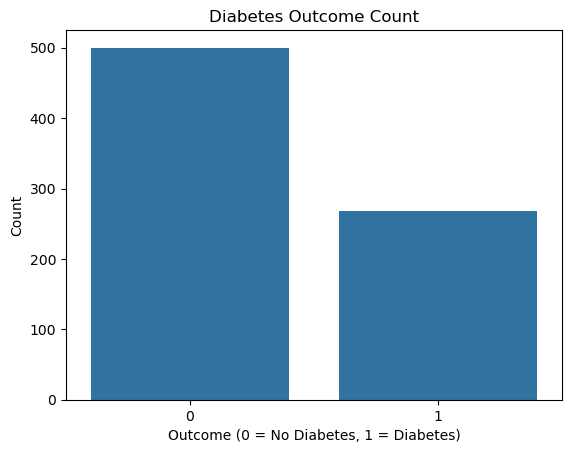

In [496]:
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.savefig("Downloads\\Diabetes Prediction and Analysis\\images\\countplot_outcome.png")
plt.show()

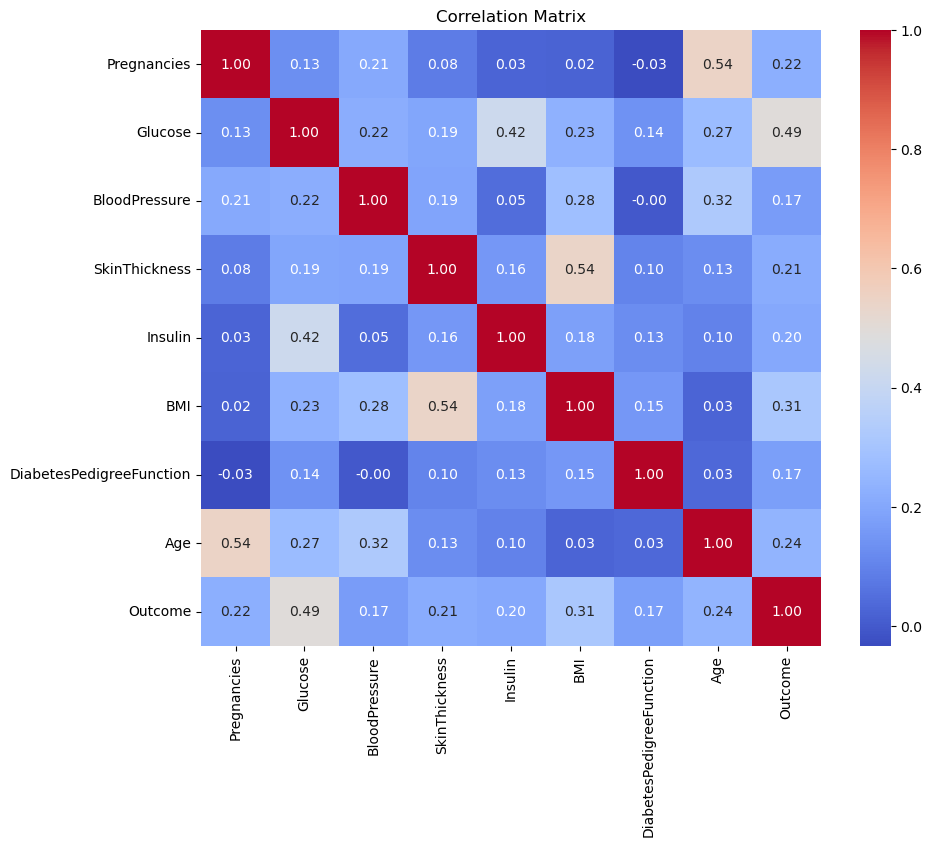

In [540]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("Downloads\\Diabetes Prediction and Analysis\\images\\correlation_heatmap.png")
plt.show()

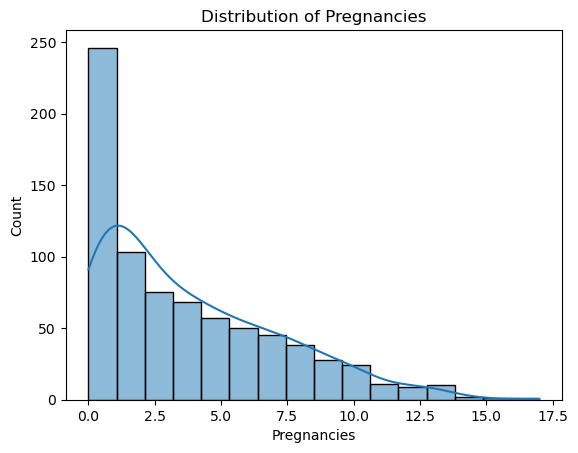

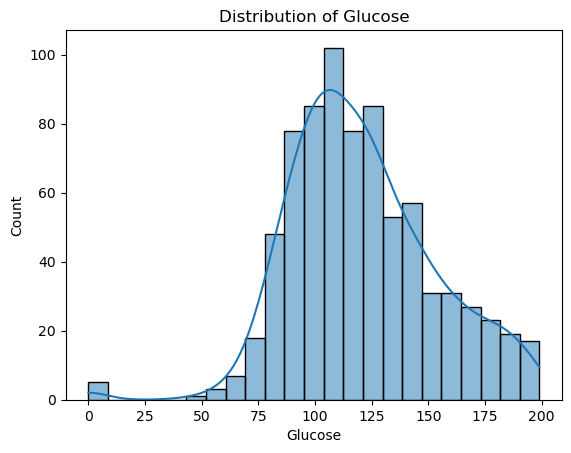

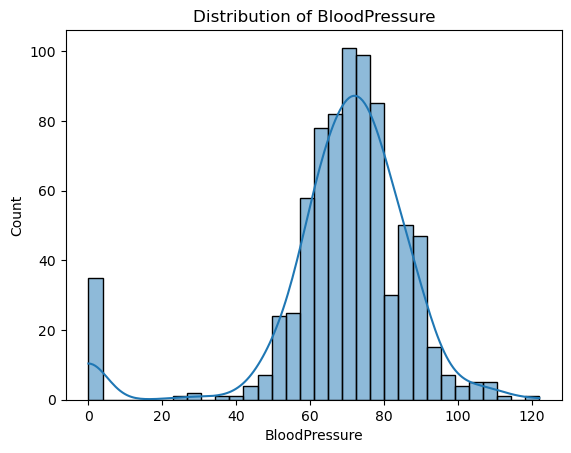

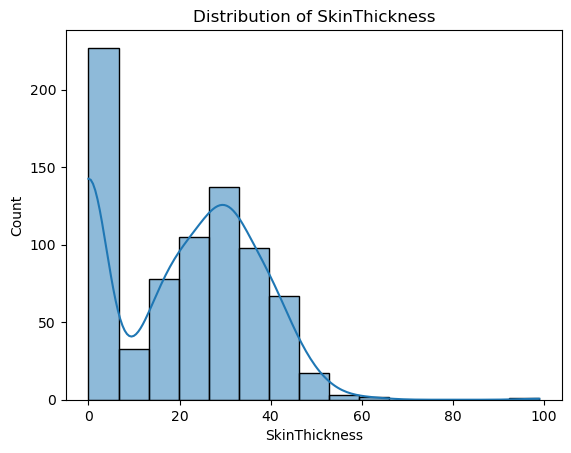

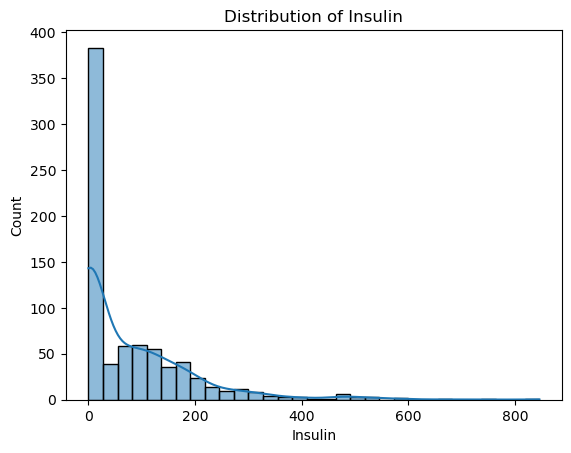

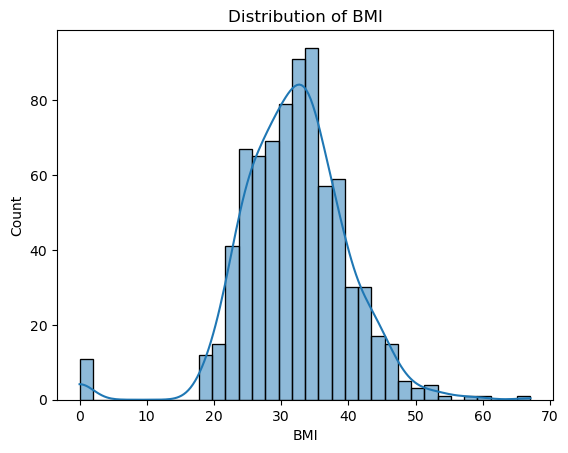

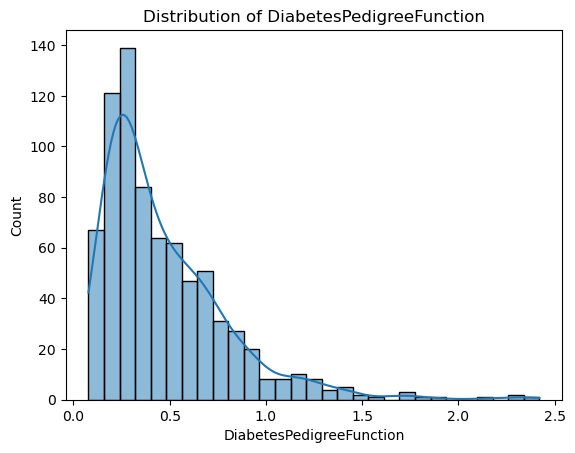

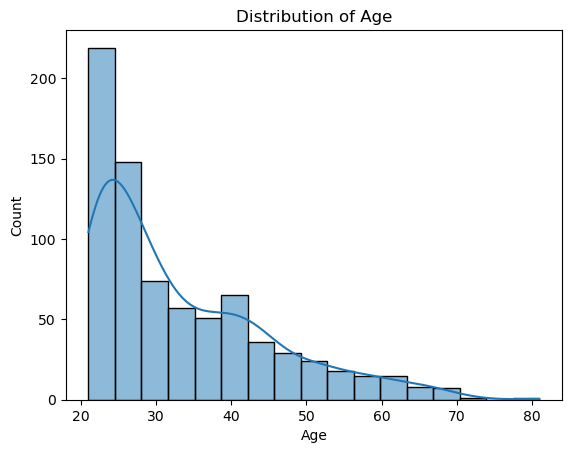

In [500]:
for col in df.columns[:-1]:  # skip 'Outcome' because it's the target
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"Downloads\\Diabetes Prediction and Analysis\\images\\histplot_{col}.png")
    plt.show()

In [502]:
from sklearn.linear_model import LogisticRegression

In [504]:
from sklearn.model_selection import train_test_split

In [506]:
from sklearn.metrics import accuracy_score

In [508]:
# 1. Split features and target
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = df['Outcome']              # The target column

In [510]:
# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [512]:
# 3. Create and train the model
model = LogisticRegression(max_iter=1000)  # Increase iterations if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [514]:
# 4. Predict on test set
y_pred = model.predict(X_test)

In [516]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[78 21]
 [18 37]]


In [518]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [520]:
# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.68%


In [522]:
# Columns where 0 is not valid
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Check how many zeros are in each
for col in invalid_zero_cols:
    print(f"{col} has {(df[col] == 0).sum()} zeros")

Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


In [524]:
import numpy as np

df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [526]:
# Impute with median (robust to outliers)
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].median())

In [528]:
duplicates = df.duplicated().sum()
print (duplicates)

0


In [530]:
if duplicates > 0:
    df = df.drop_duplicates()

In [532]:
print(df.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [534]:
print("🔹 Head:")
print(df.head())
print("\n🔹 Info:")
print(df.info())
print("\n🔹 Description:")
print(df.describe())

🔹 Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose     

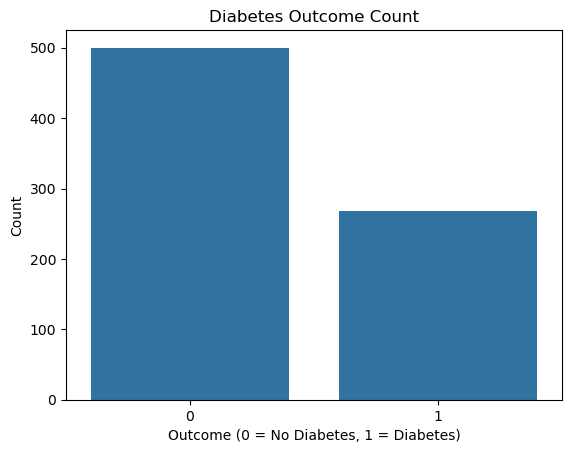

In [538]:
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.savefig("Downloads\\Diabetes Prediction and Analysis\\images\\countplot_outcome_after_cleaning.png")
plt.show()

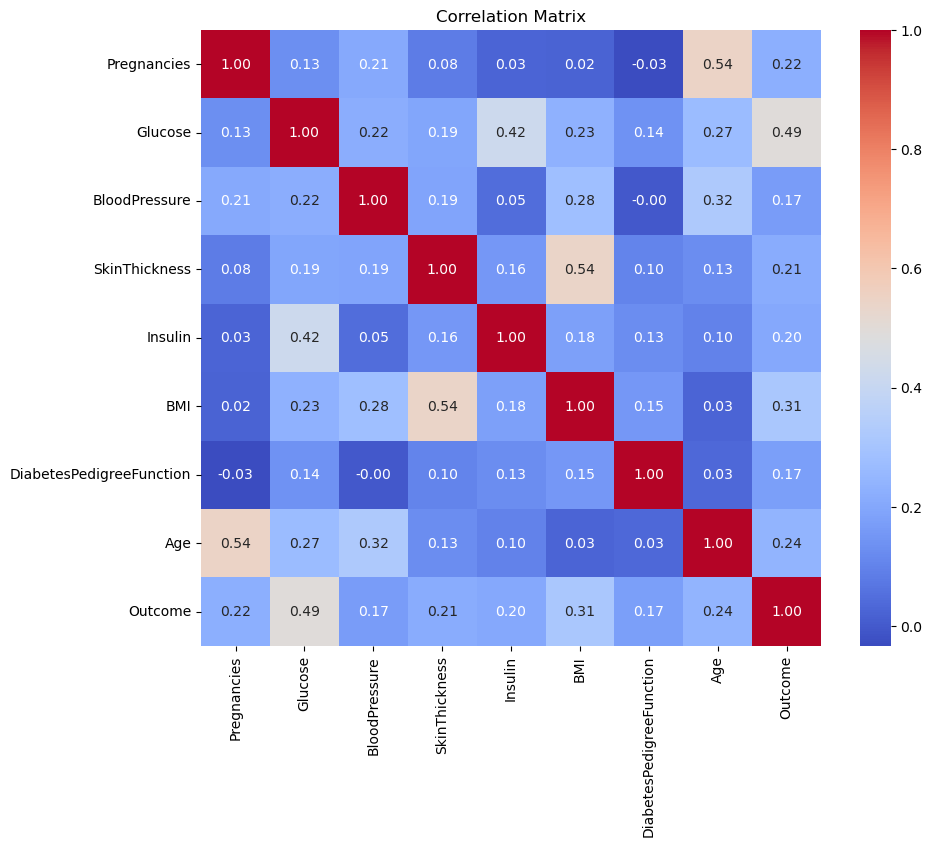

In [542]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("Downloads\\Diabetes Prediction and Analysis\\images\\correlation_heatmap_after_cleaning.png")
plt.show()

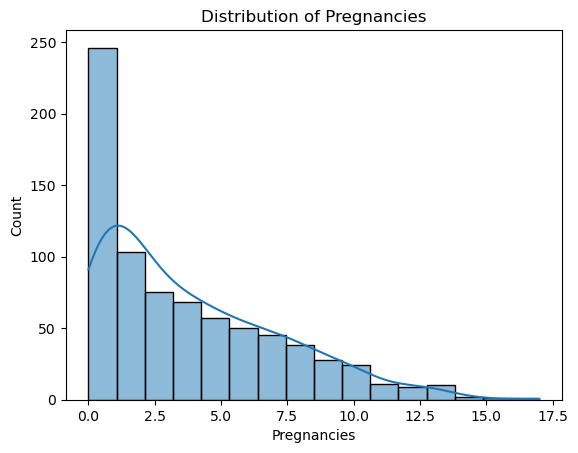

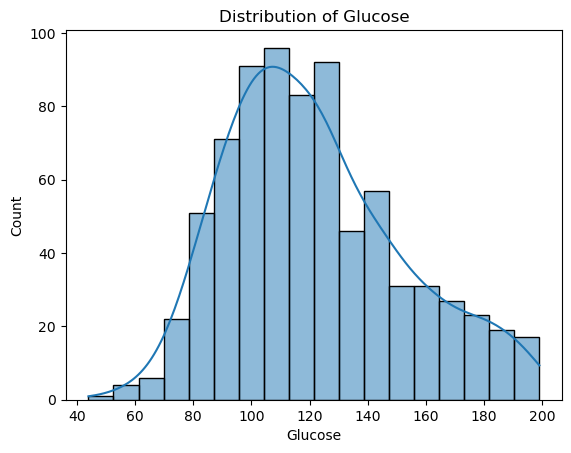

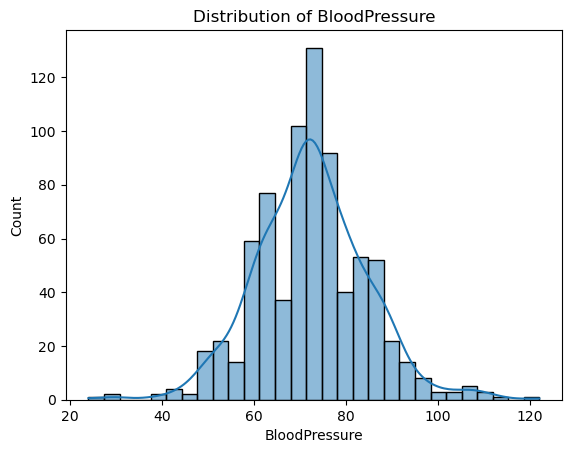

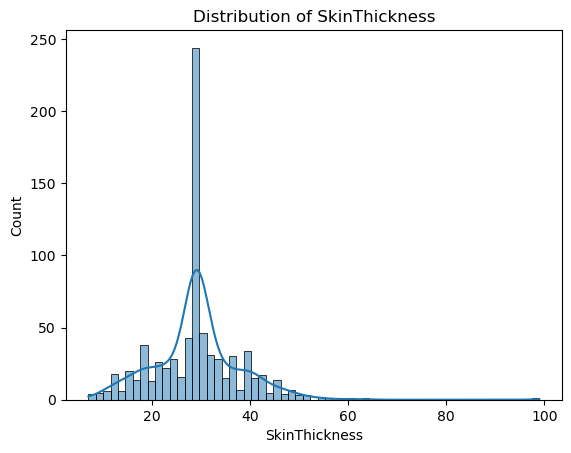

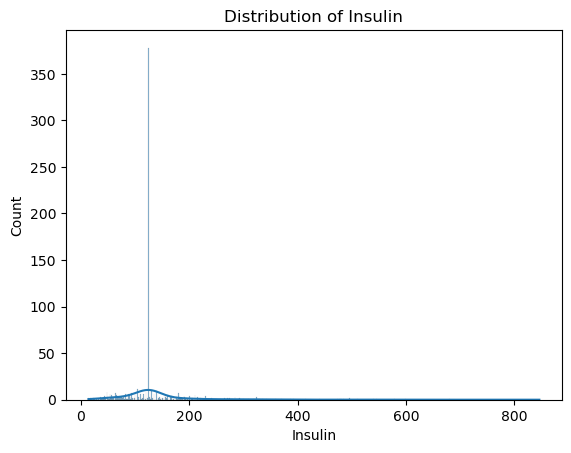

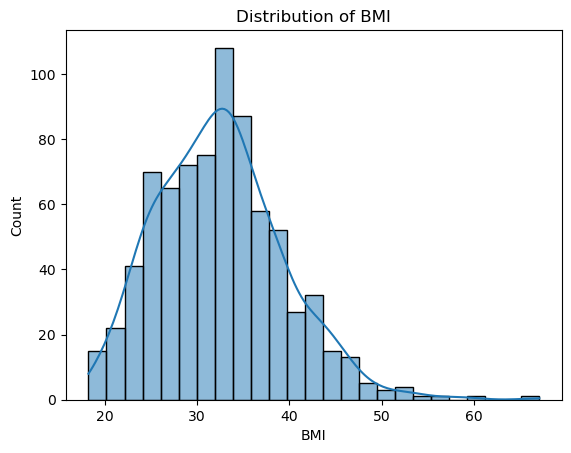

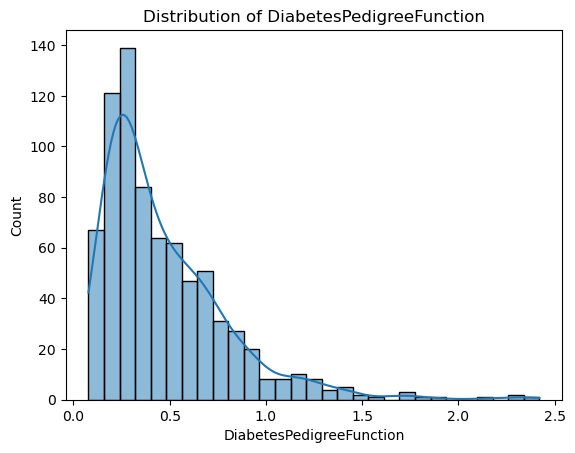

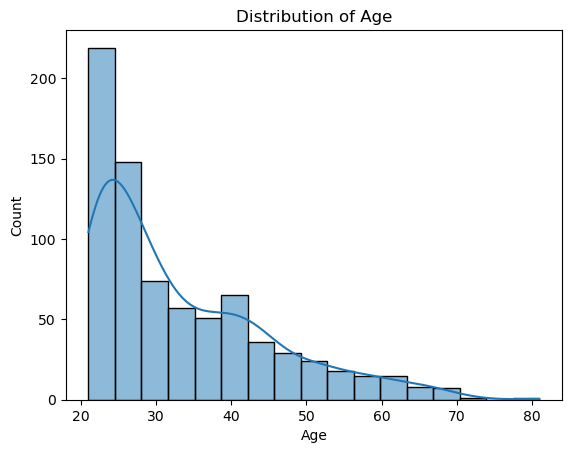

In [544]:
for col in df.columns[:-1]:  # skip 'Outcome' because it's the target
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"Downloads\\Diabetes Prediction and Analysis\\images\\histplot_{col}_after_cleaning.png")
    plt.show()

In [546]:
# 1. Split features and target
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = df['Outcome']              # The target column

In [548]:
# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [550]:
# 3. Create and train the model
model = LogisticRegression(max_iter=1000)  # Increase iterations if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [552]:
# 4. Predict on test set
y_pred = model.predict(X_test)

In [554]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[82 17]
 [21 34]]


In [556]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [560]:
# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after cleaning: {accuracy * 100:.2f}%")

Accuracy after cleaning: 75.32%
